In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
names=pd.read_csv('spam_base.names', skiprows=57, sep=':\s+', engine='python', names=['attr',''])
names=names['attr']
names= list(names)
names.append('spam_type')
names

['word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 'char_freq_!',
 'char_freq_$',
 'char_freq_#',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total',
 'spam_type']

In [5]:
dataframe=pd.read_csv('spam_base.data', names=names, header=None)

In [6]:
print(dataframe.head)

<bound method NDFrame.head of                                                                                                                        word_freq_hp  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00           0.0   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43           0.0   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06           0.0   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00           0.0   
                                                                                                                 0.00           0.0   
...                                                                                                                             ...   
0.31 0.00 0.62 0.0 0.00 0

In [7]:
dataframe.describe

<bound method NDFrame.describe of                                                                                                                        word_freq_hp  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00           0.0   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43           0.0   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06           0.0   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00           0.0   
                                                                                                                 0.00           0.0   
...                                                                                                                             ...   
0.31 0.00 0.62 0.0 0.

In [6]:
print('Cleaning data')

Cleaning data


In [8]:
print(dataframe.duplicated().value_counts())

False    4171
True      430
dtype: int64


In [9]:
dataframe = dataframe.drop_duplicates()

In [10]:
dataframe.head

<bound method NDFrame.head of                                                                                                                        word_freq_hp  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00           0.0   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43           0.0   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06           0.0   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00           0.0   
                                                                                                                 0.00           0.0   
...                                                                                                                             ...   
0.31 0.00 0.62 0.0 0.00 0

In [12]:
dataframe.isna().sum().sum()

0

In [103]:
X = dataframe.drop(columns=['spam_type'])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [14]:
Y = dataframe['spam_type']
Y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam_type, Length: 4210, dtype: int64

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=30, test_size=0.3)

In [3]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [69]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [71]:
pca = PCA(n_components=2)
x_pca = pca.fit(scaled_data)
X_test_pca = pca.fit(X_test_scaled)

In [72]:
x_pca = pca.transform(scaled_data)
X_test_pca = pca.transform(X_test_scaled)

print(scaled_data.shape)
print(x_pca.shape)

(2947, 57)
(2947, 2)


In [21]:
x_pca

array([[ 0.66788927, -0.52254124],
       [-0.08851826, -0.35075565],
       [-0.63387414, -0.40646074],
       ...,
       [-1.4112461 ,  0.29352141],
       [-0.7009475 , -0.06772774],
       [-1.38802777,  0.04431178]])

In [ ]:
X_test_pca

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,9))
plt.scatter(x_pca[:,0],x_pca[:,1], c= Y_train)
plt.xlabel('1st PCA')
plt.ylabel('2nd PCA')

In [74]:
stand_X=StandardScaler()
X_train = stand_X.fit_transform(X_train)
X_test = stand_X.transform(X_test)

In [75]:
len(Y_test)

1263

In [76]:
import math
print(math.sqrt(len(Y_test)))

35.53871128783372


In [1]:
classi = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
classi.fit(X_train,Y_train)

In [80]:
knn.fit(x_pca, Y_train)

KNeighborsClassifier(metric='euclidean')

In [81]:
Y_predict= classi.predict(X_test)
Y_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [82]:
y_pca_predict =knn.predict(X_test_pca)
y_pca_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [83]:
cm = confusion_matrix(Y_test,Y_predict)
print(cm)

[[730  51]
 [ 69 413]]


In [84]:
pca_cm = confusion_matrix(Y_test,y_pca_predict)
print(pca_cm)

[[706  75]
 [ 87 395]]


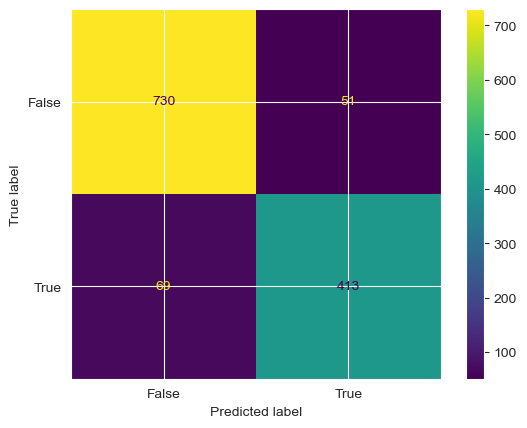

In [85]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])

cm_display.plot()
plt.show()

<Axes: >

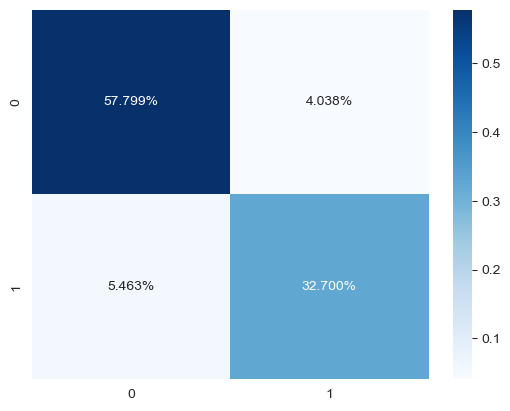

In [86]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.3%', cmap='Blues')

In [87]:
knn_f1Score = f1_score(Y_test,Y_predict)
knn_f1Score

0.8731501057082451

In [88]:
knn_pca_f1Score = f1_score(Y_test,y_pca_predict)
knn_pca_f1Score

0.8298319327731093

In [89]:
knn_accuracy = accuracy_score(Y_test,Y_predict)
knn_accuracy

0.9049881235154394

In [90]:
knn_pca_accuracy = accuracy_score(Y_test,y_pca_predict)
knn_pca_accuracy

0.8717339667458432

In [91]:
DT_classi = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=29, min_samples_leaf=57)
DT_classi.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=57,
                       random_state=1)

In [92]:
DT_Y_predict = DT_classi.predict(X_test)
DT_Y_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [93]:
DT_cm = confusion_matrix(Y_test,DT_Y_predict)
print(DT_cm)

[[710  71]
 [ 67 415]]


<Axes: >

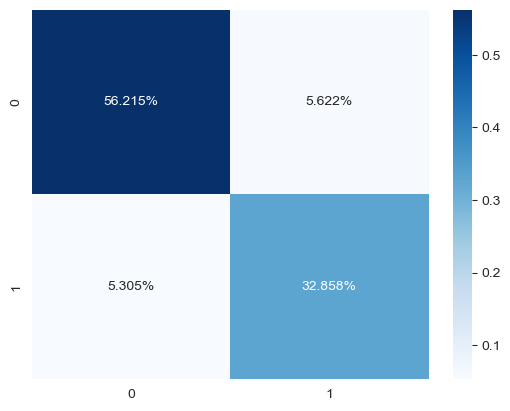

In [94]:
sns.heatmap(DT_cm/np.sum(DT_cm), annot=True,
            fmt='.3%', cmap='Blues')

In [95]:
DT_f1Score = f1_score(Y_test,DT_Y_predict)
DT_f1Score

0.8574380165289257

In [96]:
DT_accuracy = accuracy_score(Y_test,DT_Y_predict)
DT_accuracy

0.8907363420427553

In [97]:
print('KNN f1 Score ::',knn_f1Score)
print('KNN accuracy ::',knn_accuracy)
print('\n')
print('Decision Tree f1 Score:: ',DT_f1Score)
print('Decision Tree accuracy score:: ',DT_accuracy)

KNN f1 Score :: 0.8731501057082451
KNN accuracy :: 0.9049881235154394


Decision Tree f1 Score::  0.8574380165289257
Decision Tree accuracy score::  0.8907363420427553
